In [50]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import basinhopping, dual_annealing

In [80]:
def sim_anneal(f, n_it, x0, bounds, t0=1.):

    n_dim = x0.shape[0]
    
    x = x0.copy()

    e = f(x)

    rec_e = np.empty(n_it)
    rec_e[0] = e

    for k in range(n_it):
        dx = (np.random.rand(n_dim) * 2. - 1.) * 0.1
        x_probe = x + dx
        x_probe = np.minimum(bounds[1], np.maximum(bounds[0], x_probe))
        e_probe = f(x_probe)
        temp = (1. - k/n_it) * t0
        p = np.minimum(1.0, np.exp(-(e - e_probe)/temp))
        if np.random.rand() <= p:
            x = x_probe
            e = e_probe

        rec_e[k] = e
    
    return x, rec_e


In [81]:
def f(x):
    return np.exp(-np.linalg.norm(x)**2.)

In [88]:
bounds = np.empty((2, 5))
bounds[0] = -1.
bounds[1] = 1.

x, rec_e = sim_anneal(f, 400, np.ones((5)), bounds, t0=0.01)

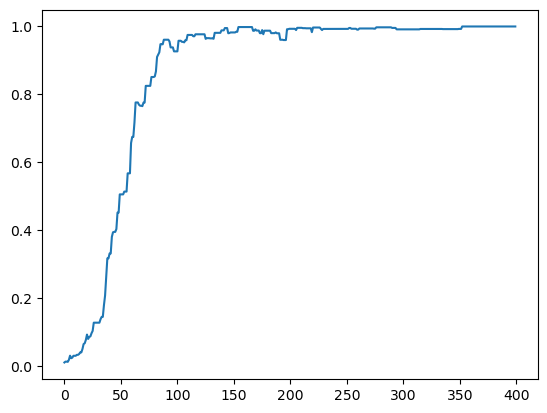

In [89]:
plt.plot(rec_e)
plt.show()